In [1]:
from heapq import merge

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

C:\Users\quinc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0197 - 20240705T112922 4h42m28s 12.770km Monte-Carlo - Saint-Roman - Monte-Carlo"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [7]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
    # Gebruik merged_df zoals je wilt
    display(merged_df.head())
else:
    print("De data is nog niet geladen.")


,Datalogger port_x,"Dataloggertijd, in s_x",Tijd sinds boot in seconden,tijd,Datum_x,Cel spanning van cel 1,Cel spanning van cel 2,Cel spanning van cel 3,Cel spanning van cel 4,Cel spanning van cel 5,...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.5,08|05,092923.000,A,4344.2300,N,00725.6064,E,None,D
0 days 00:00:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092924.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092925.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092926.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092927.000,A,4344.2300,N,00725.6066,E,None,D


In [8]:
#x_as, y_as, z_as = lib.variable_selector(merged_df)

In [9]:
#lib.plot_data(x_as, y_as, z_as)

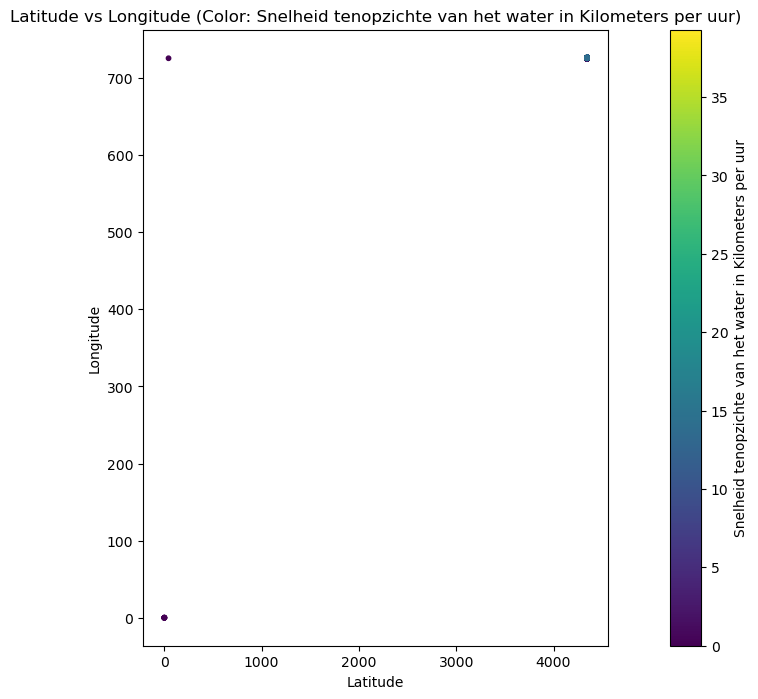

In [11]:
lib.plot_window_gui(merged_df)